# Time Inteligence Functions

YTD => Sales_YTD = TOTALYTD([Sales_measure],'Date'[Date].[Date])


QTD => Sales_QTD = TOTALQTD([Sales_measure],'Date'[Date].[Date])


MTD => Sales_MTD = TOTALMTD([Sales_measure],'Date'[Date].[Date])


Note: 

1. Using DATESYTD is the same as not using it in the date expression to calculate YTD, QTD, OR MTD
2. Sales_MTD = TOTALMTD([Sales_measure],'Date'[Date].[Date]) gives the same result if end of month is the reference date. Otherwise, the above formula will work in all cases especially when we need different end date than end of the month/quarter/year:


Example: 


Sales_MTD_July_7_2017 = TOTALMTD([Sales_measure],DATESMTD('Date'[Date].[Date]),'Date'[Date].[Date]>=DATE(2017,7,2) && 'Date'[Date].[Date]<=DATE(2017,7,7))

Here, last date of calculation will be July 7, 2017 while first date will be July 1 by default.

### MTD using Calculate
Sales_MTD_CALCULATE = CALCULATE([Sales_measure],DATESMTD('Date'[Date].[Date]))

# Previous Period: PreviousYear, PreviousQuarter, PreviousMonth
Sales_Previous Month = CALCULATE([Sales_measure],PREVIOUSMONTH('Date'[Date].[Date]))

__*Note that in the example below Year and Month as well as Date variable in the YTD, SPLY, and QTD calclations should come friom the same source*__

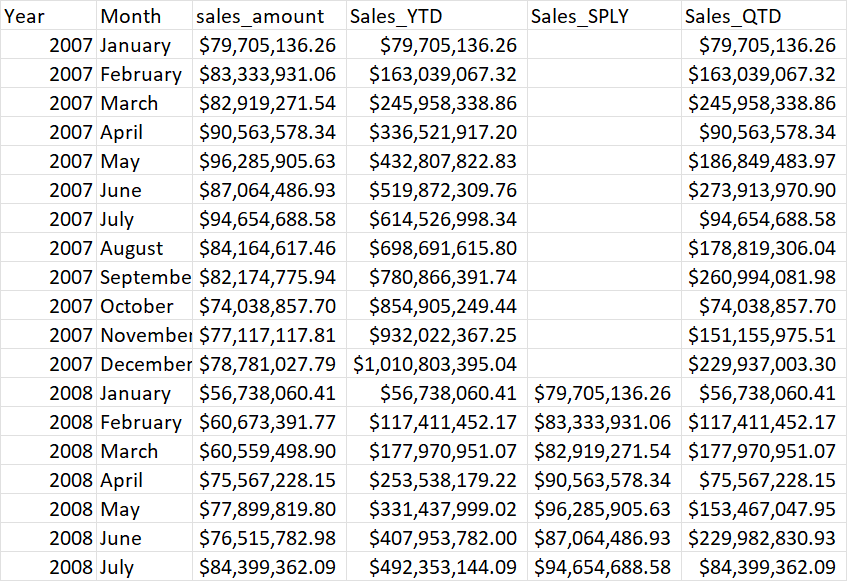

# Same Period Last Year

Sales_sameperiodlastyear = CALCULATE([Sales_measure],SAMEPERIODLASTYEAR('Date'[Date].[Date]))

# ParallelPeriod

> In this example, sales from current month is comapred with that of sales from 5 months back

sales_parallel_period = CALCULATE([Sales_measure],PARALLELPERIOD('Date'[Date].[Date],-5,MONTH))

__Note that PARALLELPERIOD for year and quarter provide constant value for a previous quarter and year respectively. Same goes for previous year__

# DATESINPERIOD

Returns a table that contains a column of dates that begins with a specified start date and continues for the specified number and type of date intervals.

This function is suited to pass as a filter to the CALCULATE function. Use it to filter an expression by standard date intervals such as days, months, quarters, or years.

__Application__: to calculate performance for a certain period counting back from a certain date.


Example below is revenue for the past 1 year starting max date which can be introduced by external filter

Revenue PY =
CALCULATE(
    SUM(Sales[Sales Amount]),
    DATESINPERIOD(
        'Date'[Date],
        MAX('Date'[Date]),
        -1,
        YEAR
    )
)

# OPENINGBALANCEQUARTER

> Shows balance for the last day of previous quarter. 

It can be done on Sales or SalesYTD

opening_balance_Sales_Quarter = OPENINGBALANCEQUARTER([Sales_measure],'Date'[Date].[Date])

opening_balance_YTD_Quarter = OPENINGBALANCEQUARTER([Sales_YTD],'Date'[Date].[Date])

# CLOSINGBALANCEQUARTER

> It gives balance by the last date of the current quarter 

closing_balance_YTD_Quarter = CLOSINGBALANCEQUARTER([Sales_YTD],'Date'[Date].[Date])

![Alt text](opening%20and%20end%20of%20quarter%20balance.png)